#Fraud Detection Model

##Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

###Importing google drive to read the data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Reading the dataset using Pandas

In [5]:
data = pd.read_csv('/content/drive/MyDrive/onlinefraud.csv')
data = data.fillna(0)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.shape

(6362620, 11)

In [7]:
data[data['isFlaggedFraud']==1].shape

(16, 11)

##Data Cleaning


In [8]:
data['nameOrig']=data['nameOrig'].apply(lambda x: x[0])

In [9]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
data[data['nameOrig']!='C'].shape

(0, 11)

All the names in nameOrig starts with C, Thus we can drop this column

In [11]:
data = data.drop(columns=['nameOrig'])
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
data['nameDest']=data['nameDest'].apply(lambda x: x[0])
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,M,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,M,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,C,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,C,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,M,0.0,0.0,0,0


We can encode the nameDest column on the basis of its 1st letter

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])
data['nameDest'] = le.fit_transform(data['nameDest'])
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,1,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,1,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,0,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,1,0.0,0.0,0,0


In [14]:
data['isFlaggedFraud'].sum()

16

In [15]:
correlation = data.corr()
correlation["isFraud"].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
type              0.020833
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
nameDest         -0.025697
Name: isFraud, dtype: float64

###Checking from Duplicated rows in the dataset

In [16]:
data.duplicated().sum()

543

###Keeping only 1 element in the duplicated dataset and dropping the other

In [17]:
data = data.drop_duplicates(keep='first')
data.duplicated().sum()

0

In [18]:
data.shape

(6362077, 10)

In [19]:
correlation = data.corr()
corr_upd = correlation["isFraud"].sort_values(ascending=False)

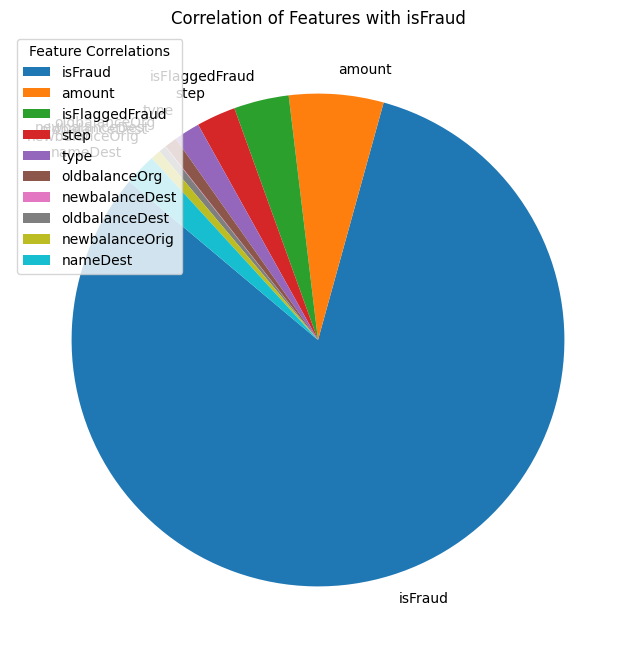

In [20]:
plt.figure(figsize=(8, 8))
plt.pie(abs(corr_upd), labels=corr_upd.index, startangle=140)
plt.title('Correlation of Features with isFraud')
plt.legend(title="Feature Correlations", loc='upper left', fontsize=10)
plt.show()

##EDA

###Analysing the dataset

In [21]:
data.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,1,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,1,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,0,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,1,0.0,0.0,0,0


In [22]:
data.value_counts('isFraud')

isFraud
0    6353880
1       8197
Name: count, dtype: int64

In [23]:
data_true = data[data['isFraud']==1]
data_false = data[data['isFraud']==0]
print(data_false.shape)
print(data_true.shape)

(6353880, 10)
(8197, 10)


###Handling Class Imbalance using model on 3 datasets with ratio of true:false=


*   1:1
*   1:2
* 1:3



In [24]:
data_false1 = data[data['isFraud']==0].sample(n=8197, random_state=1)
print(data_false1.shape)

data_false2 = data[data['isFraud']==0].sample(n=16394, random_state=1)
print(data_false2.shape)

data_false3 = data[data['isFraud']==0].sample(n=24591, random_state=1)
print(data_false3.shape)

(8197, 10)
(16394, 10)
(24591, 10)


In [25]:
data_true = data[data['isFraud']==1]
data_true.shape

(8197, 10)

In [26]:
df1 = pd.concat([data_false1, data_true])
df2 = pd.concat([data_false2, data_true])
df3 = pd.concat([data_false3, data_true])
print(df1.shape)
print(df2.shape)
print(df3.shape)

(16394, 10)
(24591, 10)
(32788, 10)


###Plot of Correlations with isFraud

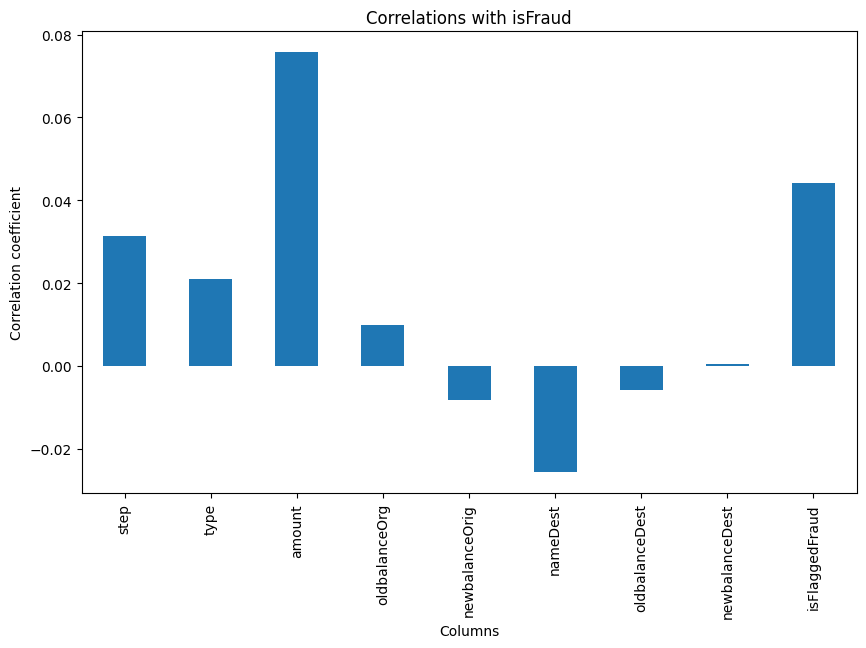

In [27]:
specific_column = 'isFraud'
correlations_with_A = correlation[specific_column]

# Plot the correlations using matplotlib
plt.figure(figsize=(10, 6))
correlations_with_A.drop(specific_column).plot(kind='bar')
plt.title(f'Correlations with {specific_column}')
plt.ylabel('Correlation coefficient')
plt.xlabel('Columns')
plt.show()

###Plotting the Pie chart to get analyze the fraud data

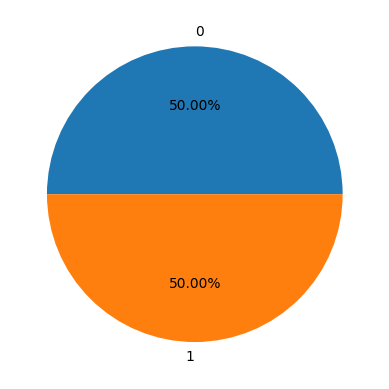

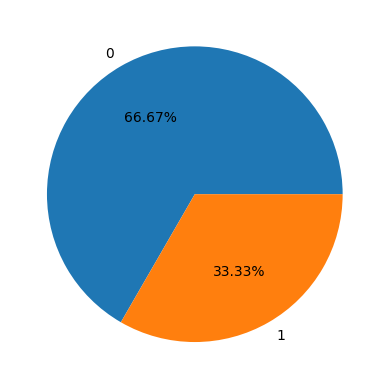

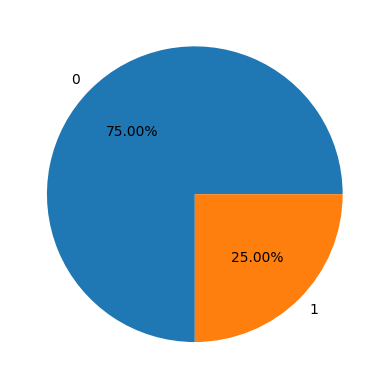

In [28]:
plt.pie(df1['isFraud'].value_counts(),labels=['0','1'],autopct='%0.2f%%')
plt.show()
plt.pie(df2['isFraud'].value_counts(),labels=['0','1'],autopct='%0.2f%%')
plt.show()
plt.pie(df3['isFraud'].value_counts(),labels=['0','1'],autopct='%0.2f%%')
plt.show()

###Dividing the 3 datasets into testing and training sets

In [29]:
x3 = np.array(df3.drop(columns=['isFraud']))
y3 = np.array(df3['isFraud'])
x2 = np.array(df2.drop(columns=['isFraud']))
y2 = np.array(df2['isFraud'])
x1 = np.array(df1.drop(columns=['isFraud']))
y1 = np.array(df1['isFraud'])

In [30]:
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=1)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=1)

##Model Training & Evaluation

###Training 3 models(one on each dataset) on 2 training algorithms:

1.   LogisticRegression
2. RandomForestClassifier


####1. LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model2 = LogisticRegression()
model3 = LogisticRegression()
model1.fit(x1_train,y1_train)
model2.fit(x2_train,y2_train)
model3.fit(x3_train,y3_train)

LogisticRegression()

Analyzing the model using model.score function of LogisticRegression

In [32]:
print(model1.score(x1_test, y1_test))
print(model2.score(x2_test, y2_test))
print(model3.score(x3_test, y3_test))

0.902714242146996
0.9099410449278309
0.9237572430619091


Checking the score of the model trained on the complete dataset

In [33]:
x = data.drop(columns=['isFraud'])
y = data['isFraud']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [34]:
model.score(x_test, y_test)

0.9982961547166964

#####roc_curve

######Function for roc_curve

In [35]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
 plt.legend(loc="lower right")
 plt.show()

In [36]:
y_test_prob = model.predict(x_test)

######Plotting the curves for the three datasets trained on Logistic model

In [37]:
y1_test_prob = model1.predict(x1_test)
y2_test_prob = model2.predict(x2_test)
y3_test_prob = model3.predict(x3_test)

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

In [39]:
fpr1, tpr1, thresholds1 = roc_curve(y1_test, y1_test_prob)
fpr2, tpr2, thresholds2 = roc_curve(y2_test, y2_test_prob)
fpr3, tpr3, thresholds3 = roc_curve(y3_test, y3_test_prob)

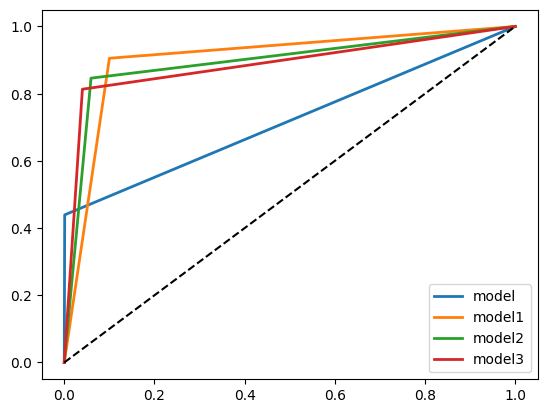

In [40]:
plt.plot(fpr, tpr, linewidth=2, label="model")
plt.plot(fpr1, tpr1, linewidth=2, label="model1")
plt.plot(fpr2, tpr2, linewidth=2, label="model2")
plt.plot(fpr3, tpr3, linewidth=2, label="model3")
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.legend(loc="lower right")
plt.show()

#####roc_auc score

######roc_auc_score for the three datasets

In [41]:
print(roc_auc_score(y1_test, y1_test_prob),
roc_auc_score(y2_test, y2_test_prob),
roc_auc_score(y3_test, y3_test_prob))

0.9026607313522156 0.8934473862609219 0.8865204506436262


######roc_auc_score for the complete dataset

In [42]:
roc_auc_score(y_test, y_test_prob)

0.7192020152293142

####2. RandomForestClassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
for_clf1 = RandomForestClassifier()
for_clf1.fit(x1_train,y1_train)
for_clf2 = RandomForestClassifier()
for_clf2.fit(x2_train,y2_train)
for_clf3 = RandomForestClassifier()
for_clf3.fit(x3_train,y3_train)

RandomForestClassifier()

#####roc_curve

In [44]:
prediction1=for_clf1.predict(x1_test)
prediction2=for_clf2.predict(x2_test)
prediction3=for_clf3.predict(x3_test)

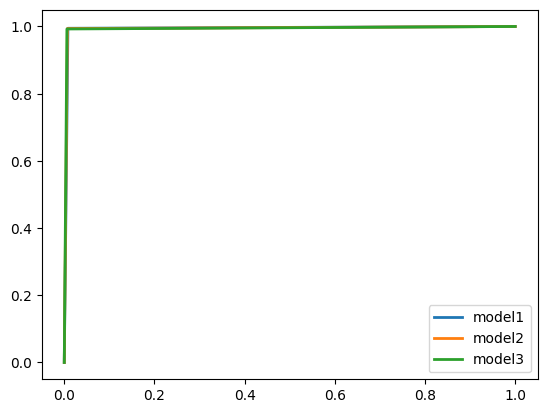

In [45]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr_rf, tpr_rf, thresholds = roc_curve(y1_test, prediction1)
fpr_rf1, tpr_rf1, thresholds = roc_curve(y2_test, prediction2)
fpr_rf2, tpr_rf2, thresholds = roc_curve(y3_test, prediction3)
plt.plot(fpr_rf, tpr_rf, linewidth=2, label="model1")
plt.plot(fpr_rf1, tpr_rf1, linewidth=2, label="model2")
plt.plot(fpr_rf2, tpr_rf2, linewidth=2, label="model3")
plt.legend(loc="lower right")
plt.show()

#####roc_auc score

In [46]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y1_test,prediction1),
roc_auc_score(y2_test,prediction2),
roc_auc_score(y3_test,prediction3))

0.9932647132381182 0.9934101009340163 0.9933462536837045


In [47]:
features = data.columns.tolist()
features.remove('isFraud')

In [48]:
dff = data[data['isFraud']==0]
dff.shape
dff=dff.drop(columns=['isFraud'])

Checking the no. of values in the complete dataset which are not Fraud still our model predicted Fraud

In [49]:
predict1 = for_clf1.predict(dff.values)
predict2 = for_clf2.predict(dff.values)
predict3 = for_clf3.predict(dff.values)


In [50]:
dff.shape

(6353880, 9)



*   1st model trained on 1:1 dataset gave 75065 false values on 6353880 data
*   2nd model trained on 1:2 dataset gave 53493 false values on 6353880 data
* 3rd model trained on 1:3 dataset gave 39503 false values on 6353880 data





In [51]:
print(predict1.sum(), predict2.sum(), predict3.sum())

75024 53203 38670


##Fine-tuning of the model

###Scaling the dataset

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
scaler.fit(x1_train)
x1_train_scaled = scaler.transform(x1_train)
x1_test_scaled = scaler.transform(x1_test)
scaler.fit(x2_train)
x2_train_scaled = scaler.transform(x2_train)
x2_test_scaled = scaler.transform(x2_test)
scaler.fit(x3_train)
x3_train_scaled = scaler.transform(x3_train)
x3_test_scaled = scaler.transform(x3_test)

In [54]:
model1.fit(x1_train_scaled,y1_train)
model2.fit(x2_train_scaled,y2_train)
model3.fit(x3_train_scaled,y3_train)

LogisticRegression()

In [55]:
print(model1.score(x1_test_scaled, y1_test),
model2.score(x2_test_scaled, y2_test),
model3.score(x3_test_scaled, y3_test))

0.9313815187557182 0.9414515145354747 0.9432753888380604


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


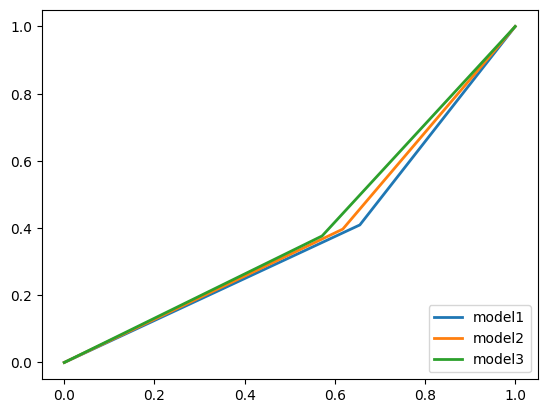

In [56]:
fpr1_tr, tpr1_tr, thresholds1 = roc_curve(y1_test, model.predict(x1_test_scaled))
fpr2_tr, tpr2_tr, thresholds2 = roc_curve(y2_test, model.predict(x2_test_scaled))
fpr3_tr, tpr3_tr, thresholds3 = roc_curve(y3_test, model.predict(x3_test_scaled))
plt.plot(fpr1_tr,tpr1_tr, linewidth=2, label="model1")
plt.plot(fpr2_tr,tpr2_tr, linewidth=2, label="model2")
plt.plot(fpr3_tr,tpr3_tr, linewidth=2, label="model3")
plt.legend(loc="lower right")
plt.show()

In [57]:
print(roc_auc_score(y1_test,model.predict(x1_test_scaled)),
roc_auc_score(y2_test,model.predict(x2_test_scaled)),
roc_auc_score(y3_test,model.predict(x3_test_scaled)))

0.37693154514679744 0.38960953977101537 0.4023878483151535


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [58]:
pred1 = for_clf1.predict(x1_test_scaled)
pred2 = for_clf2.predict(x2_test_scaled)
pred3 = for_clf3.predict(x3_test_scaled)

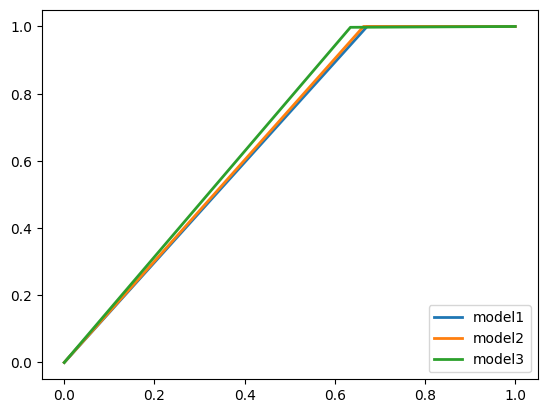

In [59]:
fpr1_rf, tpr1_rf, thresholds1 = roc_curve(y1_test, pred1)
fpr2_rf, tpr2_rf, thresholds2 = roc_curve(y2_test, pred2)
fpr3_rf, tpr3_rf, thresholds3 = roc_curve(y3_test, pred3)
plt.plot(fpr1_rf,tpr1_rf, linewidth=2, label="model1")
plt.plot(fpr2_rf,tpr2_rf, linewidth=2, label="model2")
plt.plot(fpr3_rf,tpr3_rf, linewidth=2, label="model3")
plt.legend(loc="lower right")
plt.show()

In [60]:
print(roc_auc_score(y1_test,pred1),
roc_auc_score(y2_test,pred2),
roc_auc_score(y3_test,pred3))

0.664179104477612 0.6681229285929497 0.6814321721741207


In [61]:
dff.shape

(6353880, 9)

In [62]:
scaler.fit(dff.values)
scaled_data = scaler.transform(dff.values)
pred_comp1 = for_clf1.predict(scaled_data)
pred_comp2 = for_clf2.predict(scaled_data)
pred_comp3 = for_clf3.predict(scaled_data)

In [63]:
print(pred_comp1.sum(), pred_comp2.sum(), pred_comp3.sum())

4202912 4202912 4008721


###RandomizedSearchCV

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
param_dist={
    'n_estimators' : [10, 50, 100, 150, 200],
    'max_depth' : [None,5, 10,20],
    'min_samples_split' : [2, 5, 10, 15],
    'min_samples_leaf' : [1, 2, 5, 10],
    'max_features' : ['auto', 'sqrt', 'log2', None]
}

In [65]:
scoring = make_scorer(roc_auc_score)
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=5,
    scoring=scoring,
    cv=5,
    random_state=42,
    n_jobs=-1
)


In [66]:
random_search.fit(x1_train, y1_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [10, 50, 100, 150,
                                                         200]},
                   random_state=42, scoring=make_scorer(roc_auc_score))

In [67]:
best_model = random_search.best_estimator_
best_params = random_search.best_params_
print(best_params)
y_pred = best_model.predict(x1_test)
roc_auc_score(y1_test, y_pred)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


0.9941858258081228

We obtained a roc_auc_score of 0.994185 on the model1 using randomized search CV

In [68]:
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=10,
    scoring=scoring,
    cv=5,
    random_state=42,
    n_jobs=-1
)
random_search.fit(x2_train, y2_train)
best_model = random_search.best_estimator_
best_params = random_search.best_params_
y_pred = best_model.predict(x2_test)
roc_auc_score(y2_test, y_pred)

0.9930863965049713

In [69]:
best_params

{'n_estimators': 150,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 20}

In [70]:
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=10,
    scoring=scoring,
    cv=5,
    random_state=42,
    n_jobs=-1
)
random_search.fit(x3_train, y3_train)
best_model = random_search.best_estimator_
best_params = random_search.best_params_
y_pred = best_model.predict(x3_test)
roc_auc_score(y3_test, y_pred)


0.9937575191723216

In [71]:
best_params

{'n_estimators': 150,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 20}

In [72]:

param_dist={
    'n_estimators' : [ 200,250,300,400,500],
    'max_depth' : [20,30,40,50],
    'min_samples_split' : [0.5,1,2],
    'min_samples_leaf' : [0.4,0.8,1],
    'max_features' : ['auto', 'sqrt', 'log2', None]
}

In [73]:
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=5,
    scoring=scoring,
    cv=3,
    random_state=42,
    n_jobs=-1
)
random_search.fit(x3_train, y3_train)
best_model = random_search.best_estimator_
best_params = random_search.best_params_
y_pred = best_model.predict(x3_test)
roc_auc_score(y3_test, y_pred)

0.7528605465077427

In [74]:
best_params

{'n_estimators': 200,
 'min_samples_split': 0.5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40}

##Model Interpretability

In [75]:
!pip install shap
from sklearn import preprocessing


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 9.5 MB/s eta 0:00:00


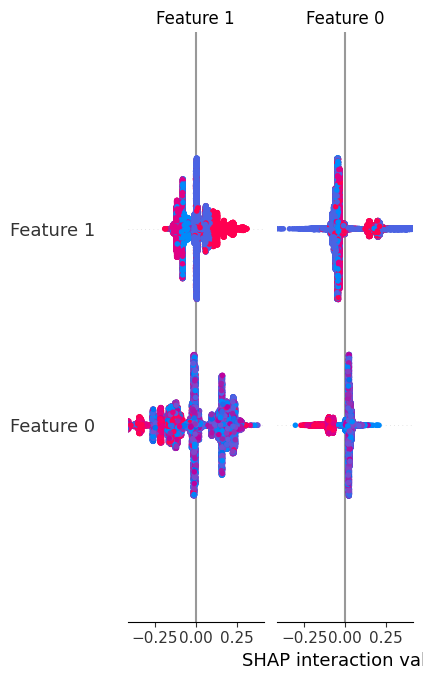

In [76]:
import shap
shap_values = shap.TreeExplainer(for_clf2).shap_values(x2_train)
shap.summary_plot(shap_values, x2_train, plot_type="bar")

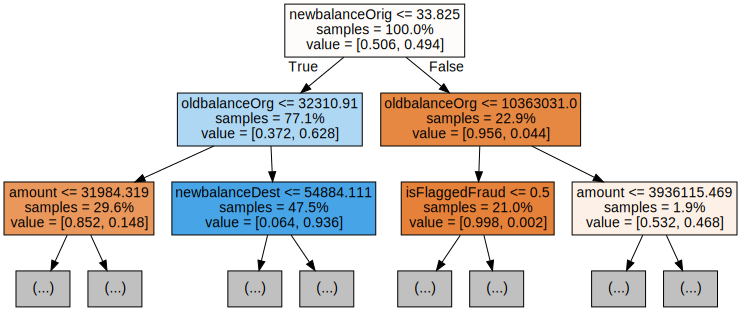

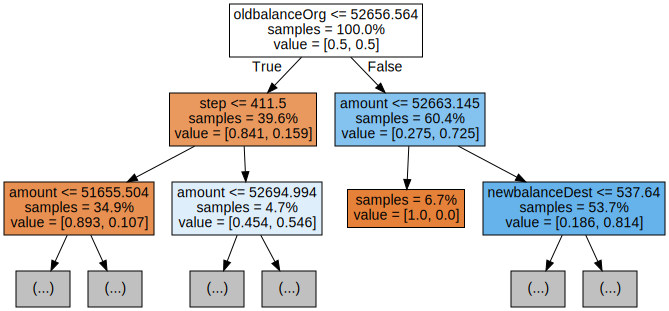

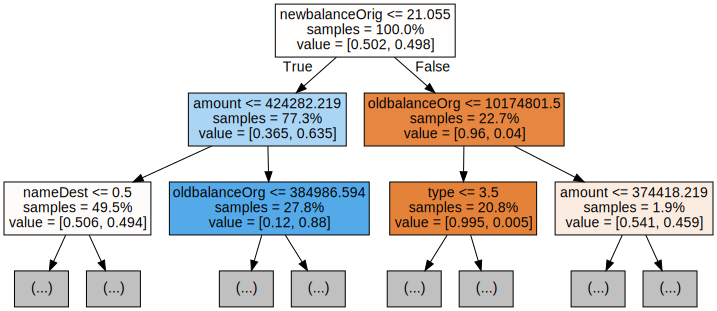

In [86]:
import graphviz
from sklearn.tree import export_graphviz # Import the missing function

features_names_x1 = ['step'	,'type','amount','oldbalanceOrg','newbalanceOrig','nameDest',	'oldbalanceDest'	,'newbalanceDest'	,'isFlaggedFraud']

for i in range(3):
    tree = for_clf1.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=features_names_x1,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Confusion Matrix for random forest model trained on 1:1 dataset

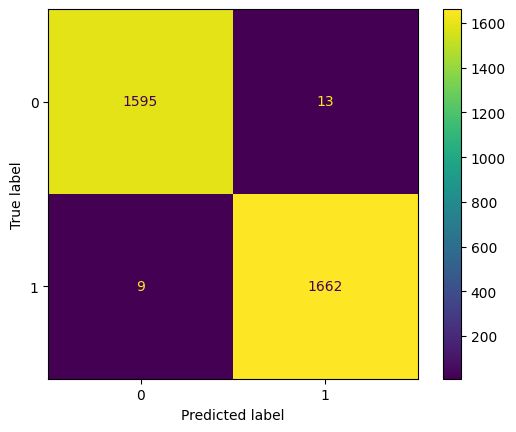

In [88]:
from sklearn.metrics import confusion_matrix # Import the missing function
from sklearn.metrics import ConfusionMatrixDisplay
matrix = confusion_matrix(y1_test, prediction1)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot();

Confusion Matrix for random forest model trained on 1:2 dataset

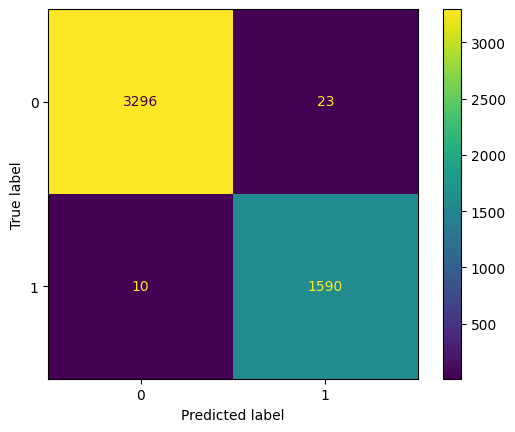

In [89]:
matrix = confusion_matrix(y2_test, prediction2)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot();

Confusion Matrix for random forest model trained on 1:3 dataset

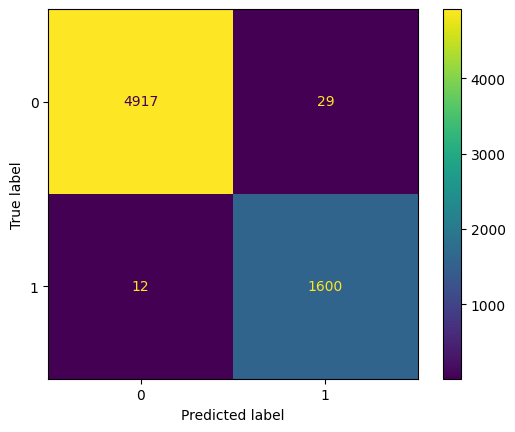

In [90]:
matrix = confusion_matrix(y3_test, prediction3)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot();